# ``Sequence-Space Jacobians of Life Cycle Models,'' a Demonstration

This notebook is a demonstration of the method and objects presented in [``Sequence-Space Jacobians of Life Cycle Models''](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5274675) by Bence Bardoczy and Mateo Velasquez-Giraldo. The repository contains an implementation of the method and code to reproduce the results presented in the paper. The goal of this notebook is to provide an interactive illustration of how to work with the different objects that the paper defines.

If you find the paper or the code in this repository useful, please cite the paper. Here is a suggested .bib entry:
```
@online{bardoczy_sequence-space_2025,
  type = {SSRN Scholarly Paper},
  title = {Sequence-{{Space Jacobians}} of {{Life Cycle Models}}},
  author = {Bardoczy, Bence and Velasquez Giraldo, Mateo},
  date = {2025-05-29},
  number = {5274675},
  eprint = {5274675},
  eprinttype = {Social Science Research Network},
  location = {Rochester, NY},
  url = {https://papers.ssrn.com/abstract=5274675},
  urldate = {2025-05-29},
  langid = {english},
  pubstate = {prepublished},
  keywords = {General Equilibrium,Heterogeneous Agent Models,Life Cycle Dynamics,Sequence Space Jacobians},
}
```

# Model Description

We concentrate on a life-cycle household block with exactly the same characteristics defined in [``Sequence-Space Jacobians of Life Cycle Models''](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5274675). At the end of the note, we show how to define the Jacobians we calculate as objects that the [sequence-jacobian](https://github.com/shade-econ/sequence-jacobian/tree/master) package will recognize. This makes it possible to place the life-cycle model in a greater macroeconomic environment and to analyze the dynamics of the resulting overlapping-generations economy. 

A summary of the life cycle household block is:
- Households live from age 26 to a maximum of 100. Time advances in years.
- They face age-specific probabilities of dying, $\delta_a$.
- They work exogenously until age 65 and then they retire.
- In their working years, they receive income $y_{i,a} = \exp\{f_a + z_{i,a}\}\times w_a$. Here:
  - $f_a$ is an age-fixed effect calibrated to match the age profile of income in the 2019 Survey of Consumer Finances.
  - $z_{i,a}$ is an idiosyncratic productivity shock that follows a discretized AR(1) proces.
  - $w_a$ is the economy-wide wage rate that prevails when the agent reaches age $a$.
- In their retirement years, they receive income $y_{i,a} = \exp\{f_a + z_{i,65}\}\times d_a$.
  - We follow the common practice of indexing pension income to the productivity shock in agent's last working period.
  - $d_a$ is an economy-wide multiplier of pensions.
- Income is taxed at a rate $\tau$.
- Every year, agents decide how much to consume. They save to insure against shocks and to prepare for retirement.
- Savings earn a risk-free return factor $R$.


The Bellman equation of a working age household is
\begin{equation}
    \begin{split}
		V_a(z_{i,a}, b_{i,a-1}) =& \max_{c_{i,a}} \frac{c_{i,a}^{1-\rho}}{1-\rho} + \beta (1-\delta_a) \mathbb{E} \left[ V_{a+1}\left(z_{i,a+1}, b_{i,a}\right) \right]\\
		\text{Subject to:}&\\
		b_{i,a} =& R \times b_{i,a-1} + (1-\tau)y_{i,a} - c_{i,a},\\
        y_{i,a} =& \exp\{f_a + z_{i,a}\}\times w_a,\\
		b_{i,a}\geq & 0,\\
        z_{i,a+1}\sim& \Pi(z_{i,a}).
	\end{split}
\end{equation}

# Computational Representation and Steady State Analysis

The household block is implemented as an class of the [HARK](https://github.com/econ-ark/HARK) toolkit. We have called this class "SimpleNKAgent." The class contains general versions of methods like a single-period backward solution or the calculation of a single-period transition matrix. These same methods are used in both infinite horizon and life-cycle versions of the model. You can find the definition of the class in the file `Tools/SimpleNKAgent.py`.

To create a particular version of our simple model---with a given income path, preferences, length of life, etc---we instantiate the class. We do so by passing the particular parameters that configure our specific version of the model. We pre-lodaded those in a dictionary called `params`, defined in the file `defs.py`. With that, we can create our agent.

In [79]:
from Tools.SimpleNKAgent import SimpleNKAgent
from defs import params

# Create agent instantiating the SimpleNKAgent class
agent = SimpleNKAgent(**params)

Next, we need to solve the model. This entails using backward iteration to find the optimal policy vectors, value functions, and transition matrices associated with the parametrization we have used.

Then, we construct the agent's "transitions" property. This is a wrapper that collects the single-period transition matrices and death probabilities; it provides convenient methods to, for example, iterate a population of agents forward in time, or find the steady state distribution of agents. This object depends on our assumption about the distribution that newborns draw their states from. We have also pre-defined as an object called `nb_dstn`.

In [80]:
# Create the initial condition for backward iteration (a dummy terminal period solution)
agent.update_solution_terminal()
# and then run backward iteration
agent.solve(verbose=False)

# The model is now solved and we can acess its solution
print(agent.solution)
# There is one solution for every age.

# Now we build the transitions, which depend on the newborn distribution.
from defs import nb_dstn
agent.build_transitions(newborn_dstn=nb_dstn)
print(agent.transitions)

[<Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9EA9F0>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9EAB70>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9E9A30>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9E9C40>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9E9340>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9E8620>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9EAED0>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9EABA0>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9EA0F0>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5AD9EB7A0>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C615F546E0>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5A2BE4C20>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5A2BE7710>, <Tools.SimpleNKAgent.SimpleNKSolution object at 0x000001C5A2BE5160>, <Tools.SimpleNKAgent.SimpleNKSolu

Now we can start inspecting the transition properties and the solution.

First, lets calculate the steady state distribution.

In [81]:
# Get the steady state distribution
ss_dstn = agent.transitions.find_steady_state_dstn()
# This is a list of arrays, one for each age, containing the steady state distribution of agents of that age.
# arrays have the same dimensions as the age-specific state space and their entries are the mass of agents in that state.

A first thing we can look at is the demographic structure of the household block.

Total mass of agents: 0.9999999999999959


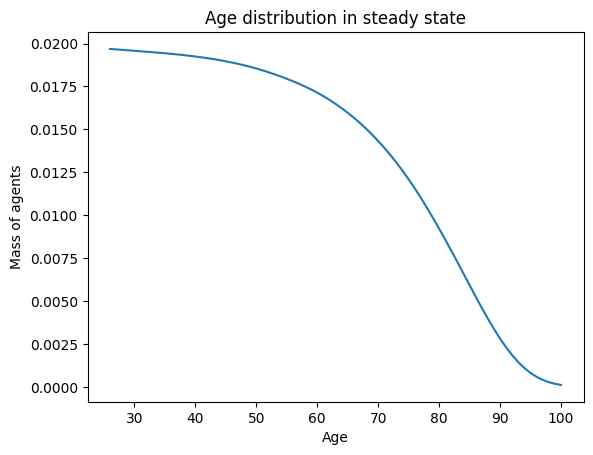

In [82]:
# Pre-load a vector with the ages of our calibration (this is just [26, 27,...,100])
from defs import age_vec

# Sum and plot the mass of agents of every age
import numpy as np
age_mass = np.array([x.sum() for x in ss_dstn])

import matplotlib.pyplot as plt
# Remove the dummy terminal period solution
plt.plot(age_vec, age_mass[:-1])
plt.xlabel('Age')
plt.ylabel('Mass of agents')
plt.title('Age distribution in steady state')

# Confirm that the mass of agents is 1
print(f'Total mass of agents: {age_mass.sum()}')

## What interesting dynamics does the life cycle introduce?

One of them is saving for retirement. Franco Modigliani's ``Life Cycle Hypothesis of Saving'' says that if a household expects its income to be lower during retirement, it will save during its working life and deccumulate its buffer of assets during retirement, smoothing its consumption.

In a simple model where a household lives for $L$ years, works for $N<L$ years earining $Y(t)$ in year $t$, and receives no retirement benefits, the household sets its consumption every year to
\begin{equation*}
C = \frac{\sum_{t=0}^{N-1} Y(t)}{L} = \frac{N \times \bar{Y}}{L}.
\end{equation*}
The next figure illustrates that consumption-saving plan from the original paper.

![](Figures/Modigliani.png)

`Modigliani, F. (1986). Life cycle, individual thrift, and the wealth of nations. Science, 234(4777), 704-712.`


Our model adds various ingredients to this example: stochastic mortality, stochastic income, borrowing constraints, impatience that is not exactly offset by interest rates. Can we still get something that looks similar?

In [83]:
# We can first extract some policy vector points from our solution. This is done with
# the method "get_outcomes." It formats policy point like our distributions from before:
# lists with one array per year, each array with one point per state configuration.

# Find the policy points for consumption, income, and start-of-period assets
outs = ["c", "income", "a_sop"]
out_points = agent.get_outcomes(outs)

C:\Users\mateo\AppData\Local\Temp\ipykernel_12468\3622237769.py:5: RuntimeWarning: invalid value encountered in divide


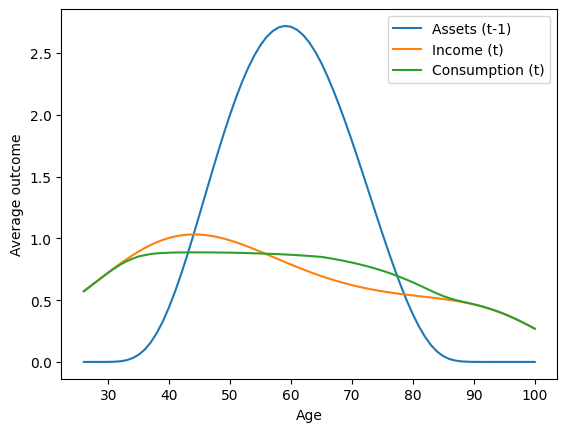

In [84]:
# Lets plot the average outcomes conditional on age.

# Find averages of all outcomes
avgs = {
    k: np.array([np.divide(np.sum(p * d), d.sum()) for p, d in zip(points, ss_dstn)])
    for k, points in out_points.items()
}

# Plot
fig =  plt.figure()
labels = {'a_sop' : 'Assets (t-1)', 'c' : 'Consumption (t)', 'income' : 'Income (t)'}
for out in ['a_sop', 'income', 'c']:
    # Again, drop the terminal dummy solution
    plt.plot(age_vec, avgs[out][:-1], label=labels[out])
plt.xlabel('Age')
plt.ylabel('Average outcome')
plt.legend()

We do get something similar to the original life cycle hypothesis paper: Consumption is smoother than income, people save in their working years and deplete those savings as they age.

The averages mask some heterogeneity, however. So let's look at the standard deviation of consumption over the life cycle to make sure we are getting some heterogeneity.

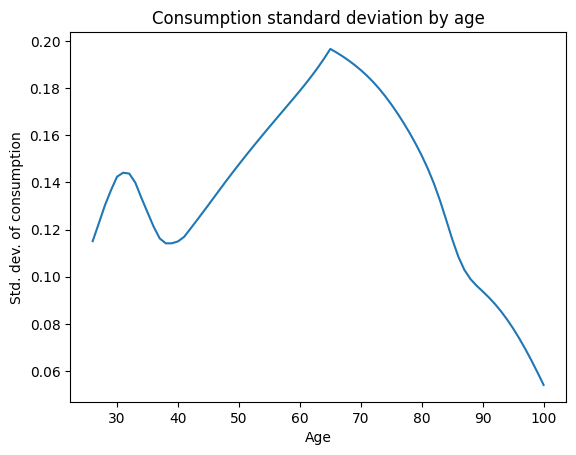

In [85]:
def weighted_std(data, weights):
    average = np.average(data, weights=weights)
    variance = np.average((data - average) ** 2, weights=weights)
    return np.sqrt(variance)

c_std = np.array([
    weighted_std(points.flatten(), d.flatten())
    for points, d in zip(out_points['c'][:-1], ss_dstn[:-1])
])

plt.figure()
plt.plot(age_vec, c_std)
plt.xlabel('Age')
plt.ylabel('Std. dev. of consumption')
plt.title('Consumption standard deviation by age')
plt.show()


# Jacobians and Fake News Matrices of the Household Block

Now let's compute the fake news matrices and jacobians of our household block. The paper outlines a method to compute them for life cycle blocks like hours. We implemented this version of the method (along with the original SSJ method for infinite horizon models) in the file `Tools/seq_jacobian.py`. Here we can just import it and apply it.

We can think of many macroeconomically relevant inputs and outputs. For our exercises, we explore:
- Outputs: consumption `c` and end-of-period assets `a`.
- Inputs: the interest rate `R`, the tax rate on income `tax_rate`, and the general level of pensions ($d$ in our model specification) `pension_mult`.

In [86]:
# Load the function
from Tools.seq_jacobian import fake_news_jacobian

# Define inputs, outputs, and parameters for the jacobian calculation
agg_inputs = ["R", "tax_rate", "pension_mult"]
outs = ['c', 'a']
T = 200
dx = 1e-4

# Now calculate jacobians and fake new matrices for each input. Time it.
from time import time
age_jacs = {}
age_fn_mats = {}
for shk_param in agg_inputs:
    print("Calculating jacobians for " + shk_param)
    t0 = time()
    age_jacs[shk_param], age_fn_mats[shk_param] = fake_news_jacobian(
        agent=agent,
        shk_param=shk_param,
        outcome_fns=outs,
        newborn_dstn=nb_dstn,
        horizon=T,
        dx=dx,
        verbose=False,
    )
    print("Elapsed time: " + str(time() - t0))

# Inspect the age-specific jacobians and Fn matrices, their shape is (Ages, Horizon(t), Horizon(s))
print('Jacobians have shape', age_jacs['R']['c'].shape)
print('Fake-news matrices have shape', age_fn_mats['R']['c'].shape)

Calculating jacobians for R
Elapsed time: 0.8151490688323975
Calculating jacobians for tax_rate
Elapsed time: 0.834507942199707
Calculating jacobians for pension_mult
Elapsed time: 0.7971398830413818
Jacobians have shape (75, 200, 200)
Fake-news matrices have shape (75, 200, 200)


## Visualizing Age-Specific Fake News Matrices

Where are the non-zero elements in Fake News matrices? Our derivations in the paper say they appear in entries that satisfy $$0\leq a-t \leq A - 1 - s.$$ Lets visualize this for three different ages.

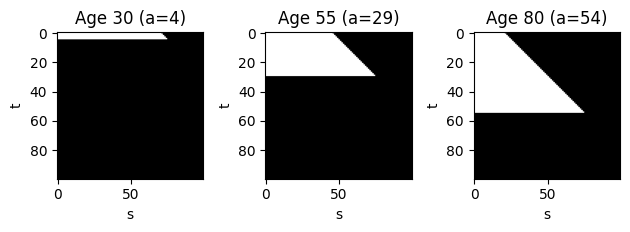

In [87]:
ages = [30, 55, 80]

fig, axs = plt.subplots(1, len(ages))
for i, age in enumerate(ages):
    axs[i].imshow(
        np.abs(age_fn_mats['R']['c'][age - age_vec[0], :100, :100])>0,
        cmap='gray',
    )
    axs[i].set_title(f"Age {age} (a={age-age_vec[0]})")
    axs[i].set_xlabel("s")
    axs[i].set_ylabel("t")
fig.tight_layout()


## Finding Aggregate Jacobians

We can find and inspect aggregate Jacobians using age-specific Jacobians, given that we know
$$\mathcal{J} = \sum_{a=0}^{A-1} \mathcal{J}[a].$$
This ammounts to to summing up the age-specific Jacobians we calculated along their first dimension (age).

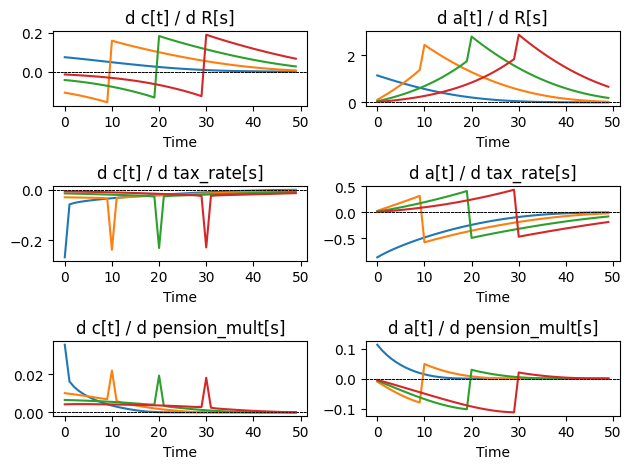

In [88]:
# Sum jacs over the age dimension to get aggregate jacobians.
agg_jacs = {
    input : {
        output : np.sum(J, axis=0) for output, J in jacs.items()
    } for input, jacs in age_jacs.items()
}

# Plot agg_jacobians
cols = [0, 10, 20, 30]
plot_tmax = 50
fig, ax = plt.subplots(len(agg_inputs), len(outs))
for i, input in enumerate(agg_inputs):
    for j, output in enumerate(outs):
        for c in cols:
            ax[i, j].plot(agg_jacs[input][output][:plot_tmax, c])
            ax[i, j].axhline(0, color='black', lw=0.5, ls='--')
        ax[i, j].set_title(f"d {output}[t] / d {input}[s]")
        ax[i, j].set_xlabel("Time")
fig.tight_layout()
plt.show()

Aggregate Jacobians have their usual shapes.

## Cohort Jacobians

A simple transformation of age-specific Jacobians is useful to track the response of a given cohort across time. If we want to track the respose of a cohort that has age $a$ at time $0$ to a time-$s$ shock, we need to consider
\begin{equation*}
    \left\{ \mathcal{J}_0^s[a], \mathcal{J}_1^{s}[a+1], \mathcal{J}_2^{s}[a+2], ...  \right\}
\end{equation*}

We can find and plot these responses for agents of different cohorts.

In [89]:
# Cohort jacobians
def cohort_jac(age_jac):
    A = age_jac.shape[0]
    T = age_jac.shape[1]

    # Dims are: cohort, time, s
    # with cohorts indexed by their age at time 0.
    c_jac = np.zeros((A, A, T))
    c_jac[:, 0, :] = age_jac[:, 0, :]
    for t in range(1, A):
        c_jac[:(-t), t, :] = age_jac[t:, t, :]

    return c_jac

coh_jacs =  {
    input : {
        output : cohort_jac(J) for output, J in jacs.items()
    } for input, jacs in age_jacs.items()
}

The linearization logic of the SSJ framework carries over to these cohort-specific Jacobians. To find the dynamic response to a given shock, we simply multiply the jacobian by the shock sequence, which aggregates over the "s" dimension of the Jacobian.

For example, lets find the dynamic response in the consumption of different cohorts to a temporary increase in the level of pensions.

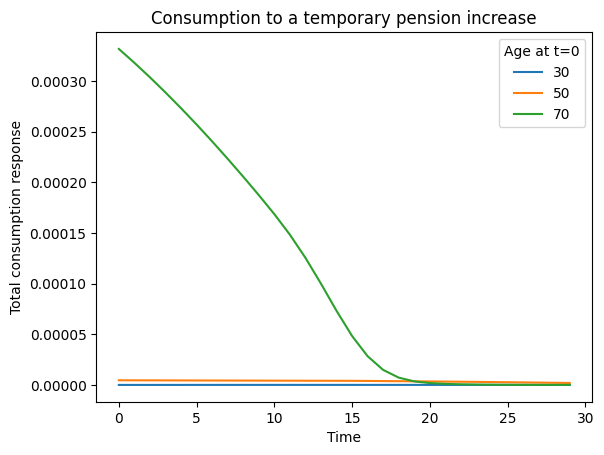

In [90]:
# Create the pension shock. Assume a 10% bump that declines by 20% per year.
pension_shock = 0.10 * (0.8 ** np.arange(T))

# Find the consumption response
coh_c_pension_resp = np.dot(coh_jacs['pension_mult']['c'], pension_shock)

# Now we plot the response of differenc cohorts
ages = [30,50,70]
t_max_plot = 30
plt.figure()
for a in ages:
    plt.plot(coh_c_pension_resp[a - age_vec[0], :t_max_plot], label=str(a))

plt.xlabel("Time")
plt.ylabel("Total consumption response")
plt.legend(title="Age at t=0")
plt.title("Consumption to a temporary pension increase")
plt.show()

It's no surprise that retirees are the most responsive to an increase in pensions. Working-age households respond much less: they are many years away from retirement, and when they do retire the shock will have decayed---they will not get the large and instantaneous bump in earnings that the current retirees get.

Now imagine that, to offset the cost of the increase in pensions, the government increases income taxes for a couple of years. What will be the effect of these two simultaneous changes? One of the many nice things about Jacobian math is that we can just add up the independent effects. The next cell does that.

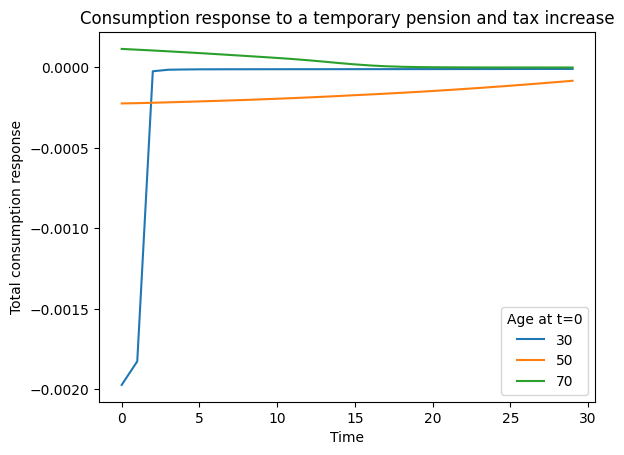

In [91]:
# Create the tax rate shock. Assume a 10% bump that lasts for 2 years.
tax_rate_shock = 0.10 * (np.arange(T) < 2)
# Find the consumption response
coh_c_tax_resp = np.dot(coh_jacs['tax_rate']['c'], tax_rate_shock)
# Find the total response to the two changes
coh_c_total_resp = coh_c_pension_resp + coh_c_tax_resp

# Plot the total response of different cohorts
plt.figure()
for a in ages:
    plt.plot(coh_c_total_resp[a - age_vec[0], :t_max_plot], label=str(a))
plt.xlabel("Time")
plt.ylabel("Total consumption response")
plt.legend(title="Age at t=0")
plt.title("Consumption response to a temporary pension and tax increase")
plt.show()

We now get a more nuanced picture:
- 30-year-olds are mostly hand-to-mouth and they reduce their consumption while the tax increase lasts.
- 50-year-olds have savings and they smooth the consumption reduction from the tax increase over a long period.
- 70 year-olds still benefit from their increased pensions.

# Equilibirum Analysis with SSJ

Our previous demonstration made completely ad-hoc assumptions about how taxes would respond to the increase in pensions.

Ideally, we would pair our household block with a more sophisticated fiscal block. It could, for example, target a certain budget deficit and increase taxes by the amount needed to maintain it. Perhaps, we could consider the effects of the pension bump on households' savings, government bonds, and interest rates.

For these types of equilibrium analyses, we must embed our household block into the infrastructure of the `sequence-jacobian` package.

We don't quite do that in this note, but we just demonstrate how to use the aggregate jacobians we calculated to create a `JacobianDict` object that can be used in lieu of "blocks," as explained in the package's [tutorials](https://github.com/shade-econ/sequence-jacobian/blob/master/notebooks/hank.ipynb).

In [92]:
import sequence_jacobian as ssj

# We must re-organize the jacobians, becasue the ssj package expects the top
# level of the dictionary to be the outputs, and the second level to be the inputs.
reordered_agg_jacs = {
    out: {input: agg_jacs[input][out] for input in agg_inputs} for out in outs
}
# Now we can create the JacobianDict object.
J_hh = ssj.JacobianDict(
    reordered_agg_jacs,
    T=T,
    name='Household'
)
# and inspect it
print(J_hh)

<JacobianDict outputs=['c', 'a'], inputs=['R', 'tax_rate', 'pension_mult']>


Happy SSJ-ing!